# Анализ убытков приложения ProcrastinatePRO+

## Описание проекта

Компания выделяет солидный бюджет на рекламу и развитие развлекательного приложения Procrastinate Pro+. Тем не менее показатели по продажам и прибыли имеют тенденцию к снижению на протяжении последнего квартала. Компания терпит убытки. 

**Основная задача**: Для выработки дальнейшей стратегии развития необходимо провести тщательный анализ и разобраться в причинах.

В распоряжении имеются  лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

## Загрузка данных, подготовка их к анализу, изучение общей информации

### Загрузка данных

Итак, начинаем проект. Сначала импортируем все необходимые библиотеки. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

С помощью `pd.set_option` настроим вывод так, чтобы все числа отражались с двумя знаками после запятой.

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

Читаем файлы `visits_info_short.csv`, `orders_info_short.csv` и `costs_info_short`. Сохраняем их в переменных `visits`, `orders` и `costs` соответственно. Получаем общую информацию о данных в таблицах при помощи метода `info()`, смотрим первые 5 строк при помощи метода `head()`. 

In [3]:
costs, orders, visits = (
                          pd.read_csv('/datasets/costs_info_short.csv', sep=','),
                          pd.read_csv('/datasets/orders_info_short.csv', sep=','),
                          pd.read_csv('/datasets/visits_info_short.csv', sep=',')
                         )

### Изучение общей информации, описание данных

Создаём функцию для вывода всей информации по датасетам для ознакомления и изучения.

In [4]:
def hello(df):
    drops = pd.DataFrame(
                         {'Количество пропусков составляет': df.isna().sum(),
                          'Доля пропусков равна': round((df.isna().sum() / len(df.index) *100))}
                         )
    duplicates = pd.Series(
                         {'Количество дубликатов составляет': df.duplicated().sum(),
                          'Доля дубликатов равна': round(df.duplicated().sum() / len(df) * 100)}
                         )
    print('Общая информация')
    print()
    print(df.info())
    print('_____________________________________________________________________________________')
    print('Пропуски')
    display(drops)
    print('_____________________________________________________________________________________')
    print('Явные дубликаты')
    display(duplicates)
    print('_____________________________________________________________________________________')
    print('Первые пять строк таблицы')
    display(df.head())
    print('_____________________________________________________________________________________')
    print('Описательная статистика')
    display(df.describe())

Начнём с датасета `costs`.

In [5]:
hello(costs)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
_____________________________________________________________________________________
Пропуски


,Количество пропусков составляет,Доля пропусков равна
dt,0,0.00
Channel,0,0.00
costs,0,0.00


_____________________________________________________________________________________
Явные дубликаты


Количество дубликатов составляет    0
Доля дубликатов равна               0
dtype: int64

_____________________________________________________________________________________
Первые пять строк таблицы


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


_____________________________________________________________________________________
Описательная статистика


,costs
count,1800.00
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


В таблице `costs` (информация о затратах на маркетинг) три колонки. Типы данных: `float64` и `object`.
Всего 1800 строк, пропуски и явные дубликаты не обнаружены.

Согласно документации к данным:

 * `Channel` — идентификатор рекламного источника.
 * `Dt` — дата.
 * `Costs` — затраты на этот рекламный источник в этот день.

In [6]:
hello(orders)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
_____________________________________________________________________________________
Пропуски


,Количество пропусков составляет,Доля пропусков равна
User Id,0,0.00
Event Dt,0,0.00
Revenue,0,0.00


_____________________________________________________________________________________
Явные дубликаты


Количество дубликатов составляет    0
Доля дубликатов равна               0
dtype: int64

_____________________________________________________________________________________
Первые пять строк таблицы


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


_____________________________________________________________________________________
Описательная статистика


,User Id,Revenue
count,40212.00,40212.00
mean,499029531203.23,5.37
std,286093675967.17,3.45
min,599326.00,4.99
25%,251132440436.75,4.99
50%,498283972665.00,4.99
75%,743332711780.00,4.99
max,999895427370.00,49.99


В таблице `orders` (информация о заказах) три колонки. Типы данных: `int64`, `float64` и `object`.
Всего 40212 строк, пропуски и дубликаты не обнаружены.

Согласно документации к данным:

 * `User Id` — уникальный id пользователя, который сделал заказ.
 * `Event Dt` — дата и время покупки.
 * `Revenue` — выручка.

In [7]:
hello(visits)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
_____________________________________________________________________________________
Пропуски


,Количество пропусков составляет,Доля пропусков равна
User Id,0,0.00
Region,0,0.00
Device,0,0.00
Channel,0,0.00
Session Start,0,0.00
Session End,0,0.00


_____________________________________________________________________________________
Явные дубликаты


Количество дубликатов составляет    0
Доля дубликатов равна               0
dtype: int64

_____________________________________________________________________________________
Первые пять строк таблицы


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


_____________________________________________________________________________________
Описательная статистика


,User Id
count,309901.00
mean,499766449382.70
std,288789916887.83
min,599326.00
25%,249369122776.00
50%,498990589687.00
75%,749521111616.00
max,999999563947.00


В таблице `visits` (лог сервера с информацией о посещениях сайта) шесть колонок. Типы данных: `int64` и `object`.
Всего 309901 строк, пропуски и дубликаты не обнаружены.

Согласно документации к данным:

* `User Id` — уникальный идентификатор пользователя
* `Device` — категория устройства пользователя
* `Session start` — дата и время начала сессии
* `Session End` — дата и время окончания сессии
* `Channel` — идентификатор рекламного источника, из которого пришел пользователь
* `Region` - страна пользователя

### Оптимизация и подготовка данных.

Для начала вспомним три основных правила стиля в названиях колонок:
   1. Только строчные буквы.
   2. Отсутствуют пробелы.
   3. Слова разделены подчёркиванием.

Выводим на экран названия столбцов, т.к. есть подозрения в том, что они некорректно оформлены.

In [8]:
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [9]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [10]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

В нашем случае очевидное нарушение всех трёх пунктов. Необходимо всё исправить.

In [11]:
costs.columns = costs.columns.str.lower() # Все названия колонок перевели в нижний регистр.
costs.columns # проверка результатов

Index(['dt', 'channel', 'costs'], dtype='object')

In [12]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
orders.columns # проверка результатов

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [13]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits.columns # проверка результатов

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Во всех трёх датафреймах даты необходимо преобразовать из `object` в `date`. 

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

## Функции для расчета и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми мы познакомились в теоретических уроках, поэтому смело этим воспользуемся.
Пойдём по порядку, указанному в названии шага.

Начнём с функций для расчёта LTV и ROI:

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для расчёта удержания:

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта конверсии:

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

А также функции для визуализации этих метрик — `filter_data()`, `plot_retention()`, `plot_conversion()` и `plot_ltv_roi()`.

Функция для сглаживания фрейма.

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации удержания.

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


Функция для визуализации конверсии.

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI.

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


## Исследовательский анализ данных.

### Создание пользовательских профилей, определение минимальной и максимальной даты привлечения пользователей.

В этом шаге нам необходимо построить профили пользователей и определить минимальную и максимальную дату привлечения пользователей. Функцию для создания профилей `get_profiles()` возьмём из теоретического курса.

In [22]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Теперь можно получить профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках, событиях и тратах на рекламу «Procrastinate Pro+».

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [24]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


Теперь определим минимальную и максимальную даты привлечения пользователей.

In [25]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min()) 
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Отметим, что минимальная и максимальная даты привлечения пользователей полностью соответствуют указанному в задании периоду.

### Распределение платящих пользователей по регионам. 

Теперь необходимо выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Строим таблицу `payers_and_region`, отражающую количество пользователей и долю платящих из каждой страны.

In [26]:
payers_and_region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}).reset_index()
payers_and_region.columns = ['region','total_users', 'total_payers', 'share_of_payers']
payers_and_region = payers_and_region.sort_values(by='total_payers', ascending=False)
payers_and_region['share_of_payers'] = payers_and_region['share_of_payers'] * 100
display(payers_and_region)

,region,total_users,total_payers,share_of_payers
3,United States,100002,6902,6.90
2,UK,17575,700,3.98
0,France,17450,663,3.80
1,Germany,14981,616,4.11


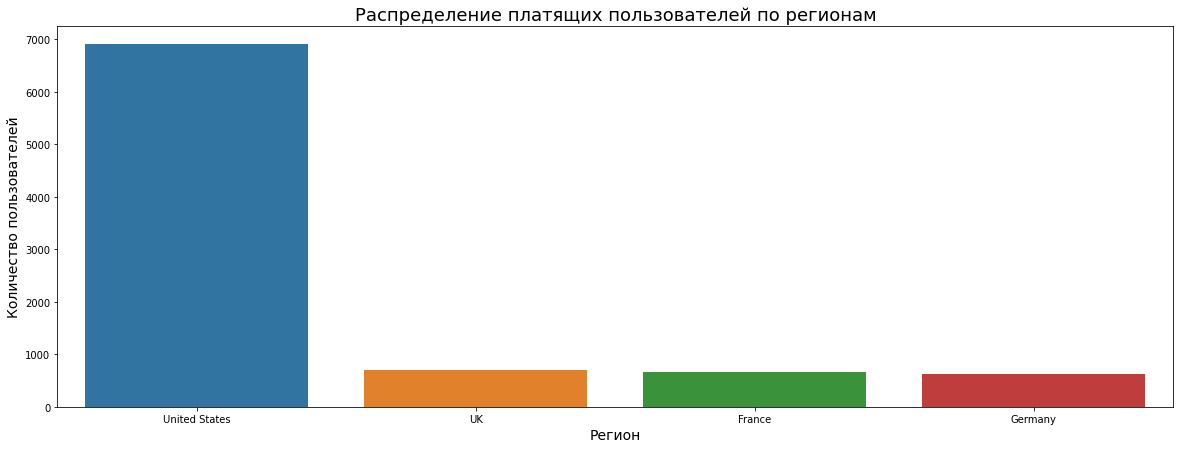

In [27]:
plt.figure(figsize=(20, 7))
sns.barplot(data=payers_and_region, x='region', y='total_payers')
plt.title('Распределение платящих пользователей по регионам', fontsize=18)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14);

### Вывод.

Очевидно, что пользователи приходят в приложение из 4 стран: Франции, Германии, Великобритании и США. При этом на США приходится больше всего пользователей - 100 002, больше всего платящих - 6902 и самый большой процент платящих пользователей - 6,9%. С большим отрывом от первого места расположились три других страны. Их показатели очень близки друг к другу.

### Распределение платящих пользователей по используемым устройствам. 

Теперь необходимо вычислить, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Cтроим таблицу `payers_and_devices`, отражающую количество пользователей и долю платящих для каждого устройства по аналогии с предыдущим подпунктом.

In [28]:
payers_and_devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}).reset_index()
payers_and_devices.columns = ['device','total_users', 'total_payers', 'share_of_payers']
payers_and_devices = payers_and_devices.sort_values(by='total_payers', ascending=False)
payers_and_devices['share_of_payers'] = payers_and_devices['share_of_payers'] * 100
display(payers_and_devices)

,device,total_users,total_payers,share_of_payers
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


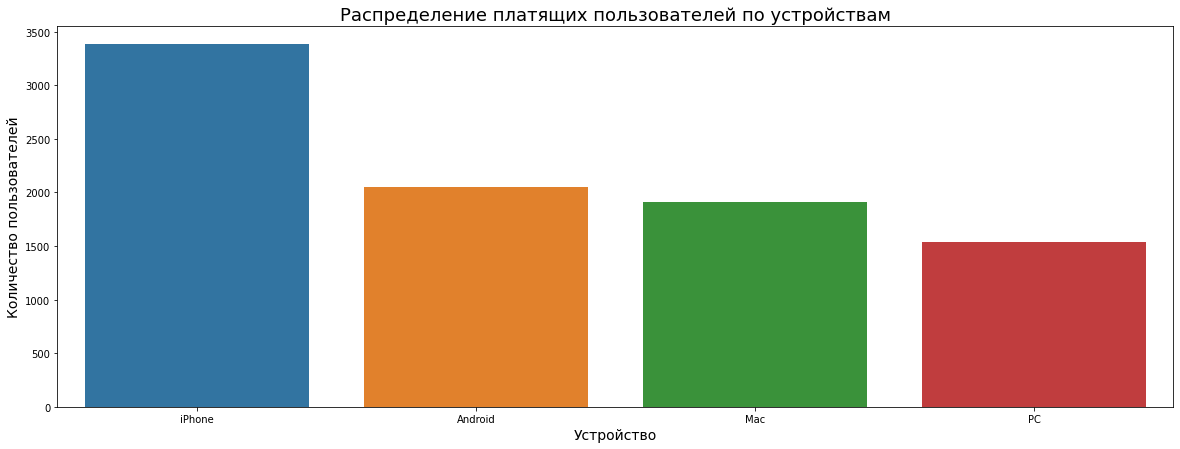

In [29]:
plt.figure(figsize=(20, 7))
sns.barplot(data=payers_and_devices, x='device', y='total_payers')
plt.title('Распределение платящих пользователей по устройствам', fontsize=18)
plt.xlabel('Устройство', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14);

### Вывод.

Из таблички `payers_and_devices` и графика наглядно видно, что клиенты предпочитают Android, Mac, PC и iPhone. В абсолютных цифрах больше всего клиентов пользуется iPhone - 54 479, платящих пользователей также больше всего у iPhone - 3382. В относительных показателях iPhone немного уступает Mac - 6,2% против 6,36% соответственно.

### Распределение платящих пользователей по рекламным источникам привлечения. 

Необходимо изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Строим таблицу `payers_and_channel`, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [30]:
payers_and_channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}).reset_index() 
payers_and_channel.columns = ['channel','total_users', 'total_payers', 'share_of_payers']
payers_and_channel = payers_and_channel.sort_values(by='total_payers', ascending=False)
payers_and_channel['share_of_payers'] = payers_and_channel['share_of_payers'] * 100
display(payers_and_channel)

,channel,total_users,total_payers,share_of_payers
1,FaceBoom,29144,3557,12.20
6,TipTop,19561,1878,9.60
10,organic,56439,1160,2.06
7,WahooNetBanner,8553,453,5.30
0,AdNonSense,3880,440,11.34
5,RocketSuperAds,4448,352,7.91
2,LeapBob,8553,262,3.06
4,OppleCreativeMedia,8605,233,2.71
9,lambdaMediaAds,2149,225,10.47
8,YRabbit,4312,165,3.83


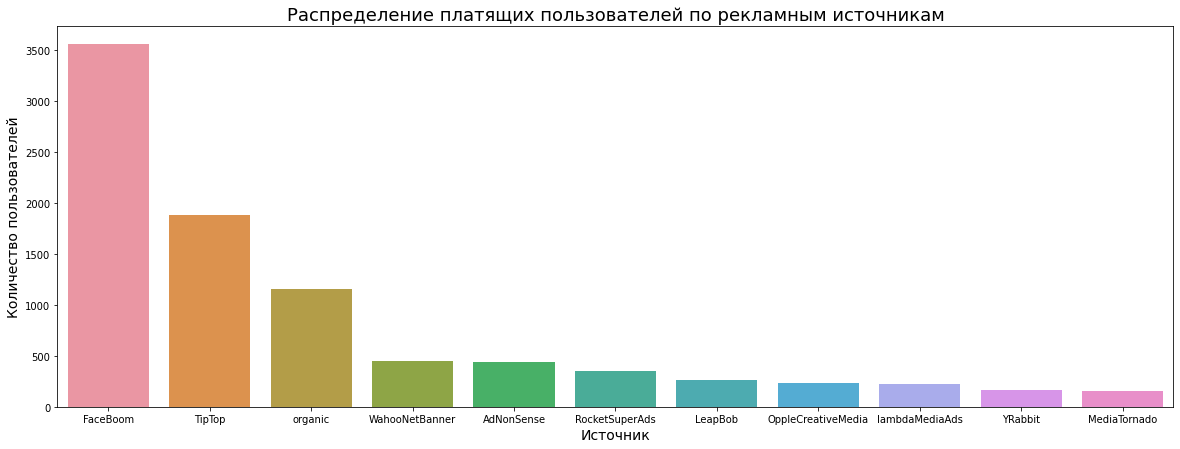

In [31]:
plt.figure(figsize=(20, 7))
sns.barplot(data=payers_and_channel, x='channel', y='total_payers')
plt.title('Распределение платящих пользователей по рекламным источникам', fontsize=18)
plt.xlabel('Источник', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14);

### Вывод.

Из таблички `payers_and_channel` и графика наглядно видно, что больше всего пользователей пришло органическим путём: всего - 56439 человек. При этом платящих пользователей больше всего принёс канал FaceBoom - 3557, второе место с большим отрывом занимает канал TipTop - 1878 платящих пользователей, третье - органический или бесплатный канал. Причём в относительных показателях FaceBoom также лидирует - 12,2%.

### Вывод.

Итак, по результатам проведённых исследований мы получили следующие выводы.
 *  Большая часть пользователей, как платящих, так и в тотале, приходит в приложение из США. Стоит отметить, что США лидирует с огромным отрывом. Даже если сложить показатели трёх других стран вместе, США будет их опережать.
 * Больше всего клиентов пользуется iPhone - 54 479, платящих пользователей также больше всего у iPhone - 3382. 
 * Больше всего клиентов пришли органическим или бесплатным путём. В тоже время канал FaceBoom привлёк наибольшее число платящих пользователей как в абсолютных, так и в относительных показателях.

## Маркетинг.

### Общие расходы на маркетинг, распределение по источникам.

Необходимо рассчитать общую сумму расходов на маркетинг.

In [32]:
print('Общая сумма расходов на маркетинг составляет:', round(costs['costs'].sum(), 2))

Общая сумма расходов на маркетинг составляет: 105497.3


Разберёмся в маркетинговых расходах, выясним как траты распределены по источникам.

In [33]:
total_costs = profiles.groupby('channel').agg({'acquisition_cost': ['sum']}).reset_index()
total_costs.columns = ['channel', 'total_costs']
total_costs = total_costs.sort_values(by='total_costs', ascending=False)
total_costs

,channel,total_costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Визуализируем `total_costs` для наглядности.

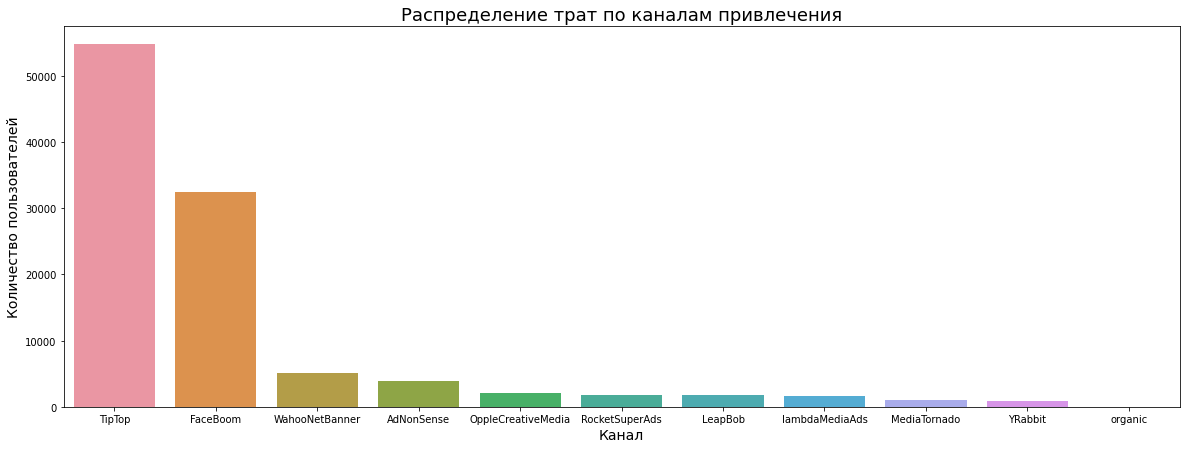

In [34]:
plt.figure(figsize=(20, 7))
sns.barplot(data=total_costs, x='channel', y='total_costs')
plt.title('Распределение трат по каналам привлечения', fontsize=18)
plt.xlabel('Канал', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14);

Очевидно, что самые большие затраты приходятся на канал `TipTop` и `FaceBoom`. Причём затраты на каждый из них значительно превосходят суммарные затраты на все остальные каналы. Канал `organic` равен 0, т.к. это покупатели, пришедшие без затрат на маркетинг, что подтверждается графиком (выше) и табличкой `total_costs`. 

Визуализируем изменения метрик во времени.

In [35]:
total_costs_per_month = profiles.groupby(['channel', 'month']).agg({'acquisition_cost': 'sum'}).reset_index()
total_costs_per_month.columns = ['channel', 'month', 'total_costs_per_month']
display(total_costs_per_month)

,channel,month,total_costs_per_month
0,AdNonSense,2019-05-01,1169.70
1,AdNonSense,2019-06-01,538.65
2,AdNonSense,2019-07-01,504.00
3,AdNonSense,2019-08-01,579.60
4,AdNonSense,2019-09-01,581.70
...,...,...,...
61,organic,2019-06-01,0.00
62,organic,2019-07-01,0.00
63,organic,2019-08-01,0.00
64,organic,2019-09-01,0.00


Теперь для наглядности для каждого канала с данными по месячным расходам на маркетинг сделаем свой график. Начнём с самых затратных и пойдём на понижение. Итак, начнём с канала **TipTop**, далее продолжим по аналогии.

In [36]:
TipTop_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'TipTop']
display(TipTop_per_month)

,channel,month,total_costs_per_month
36,TipTop,2019-05-01,2981.00
37,TipTop,2019-06-01,6675.60
38,TipTop,2019-07-01,8410.20
39,TipTop,2019-08-01,11202.00
40,TipTop,2019-09-01,13232.50
41,TipTop,2019-10-01,12250.00


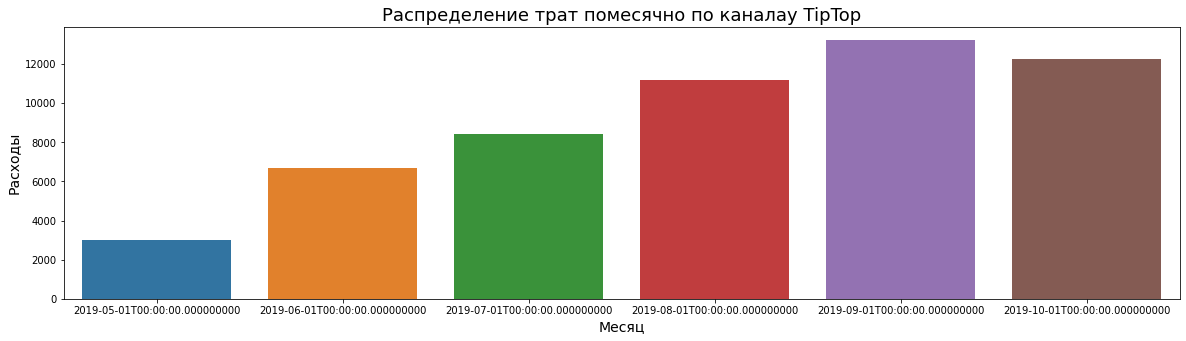

In [37]:
plt.figure(figsize=(20, 5))
sns.barplot(data=TipTop_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау TipTop', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Из графика и таблички `TipTop_per_month` наглядно видно, что с мая по сентябрь расходы на маркетинг постоянно росли, немного сократившись в октябре. Важный отметить, что за октябрь мы обладаем не всеми данными, этим может быть обоснована просадка в бюджетах. 

Далее **FaceBoom**. Подготавливаем табличку `FaceBoom_per_month` по аналогии с предыдущим каналом.

In [38]:
FaceBoom_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'FaceBoom']
display(FaceBoom_per_month)

,channel,month,total_costs_per_month
6,FaceBoom,2019-05-01,3524.40
7,FaceBoom,2019-06-01,5501.10
8,FaceBoom,2019-07-01,5294.30
9,FaceBoom,2019-08-01,6274.40
10,FaceBoom,2019-09-01,6114.90
11,FaceBoom,2019-10-01,5736.50


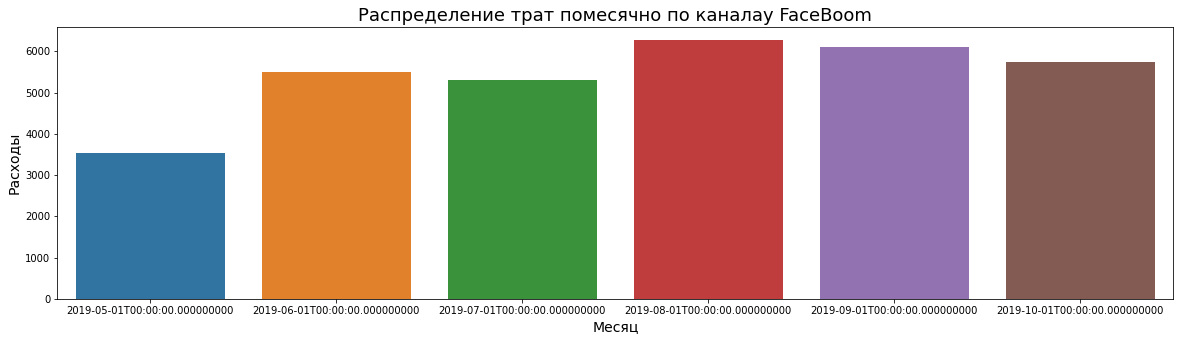

In [39]:
plt.figure(figsize=(20, 5))
sns.barplot(data=FaceBoom_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау FaceBoom', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Очевидно, что затраты на маркетинг в этом канале более равномерные. Только в мае они были ниже, в остальные месяцы разница минимальна.

Далее канал **WahooNetBanner**.

In [40]:
WahooNetBanner_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'WahooNetBanner']
display(WahooNetBanner_per_month)

,channel,month,total_costs_per_month
42,WahooNetBanner,2019-05-01,418.80
43,WahooNetBanner,2019-06-01,921.00
44,WahooNetBanner,2019-07-01,851.40
45,WahooNetBanner,2019-08-01,1040.40
46,WahooNetBanner,2019-09-01,977.40
47,WahooNetBanner,2019-10-01,942.00


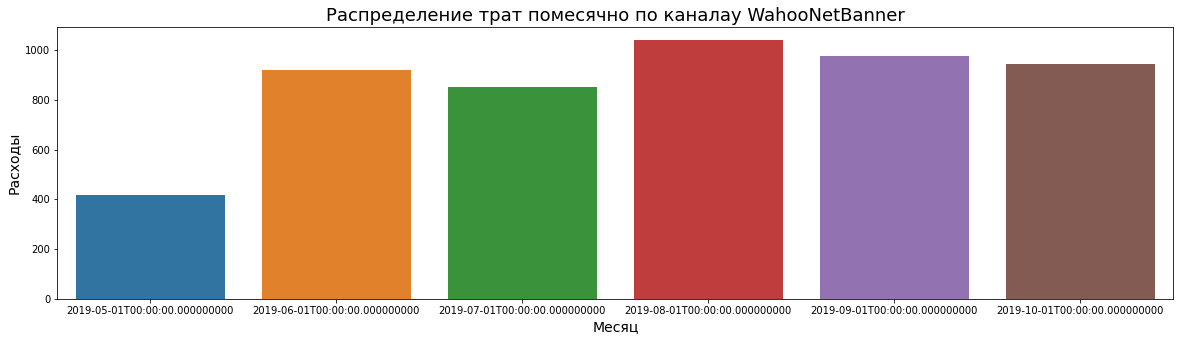

In [41]:
plt.figure(figsize=(20, 5))
sns.barplot(data=WahooNetBanner_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау WahooNetBanner', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Распределение затрат на маркетинг по месяцам в канале `WahooNetBanner` очень похоже на `FaceBoom`, такое же равномерное с минимальными затратами в мае и максимальными в августе, графики схожи. Но в абсолютных показателях расходы в разы меньше.

**AdNonSense**.

In [42]:
AdNonSense_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'AdNonSense']
display(AdNonSense_per_month)

,channel,month,total_costs_per_month
0,AdNonSense,2019-05-01,1169.70
1,AdNonSense,2019-06-01,538.65
2,AdNonSense,2019-07-01,504.00
3,AdNonSense,2019-08-01,579.60
4,AdNonSense,2019-09-01,581.70
5,AdNonSense,2019-10-01,537.60


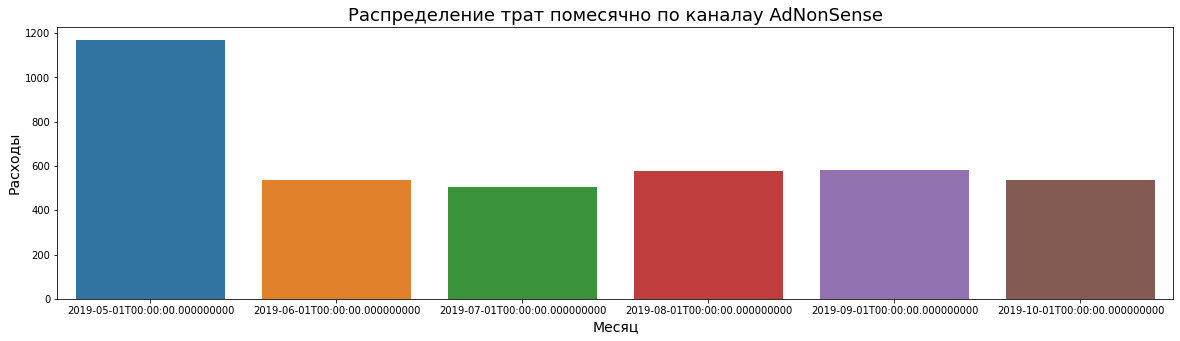

In [43]:
plt.figure(figsize=(20, 5))
sns.barplot(data=AdNonSense_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау AdNonSense', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Затраты на маркетинг в этом канале равномерны. Только в мае они были значительно выше, в остальные месяцы разница минимальна.

**OppleCreativeMedia**

In [44]:
OppleCreativeMedia_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'OppleCreativeMedia']
display(OppleCreativeMedia_per_month)

,channel,month,total_costs_per_month
24,OppleCreativeMedia,2019-05-01,169.75
25,OppleCreativeMedia,2019-06-01,370.00
26,OppleCreativeMedia,2019-07-01,366.50
27,OppleCreativeMedia,2019-08-01,439.25
28,OppleCreativeMedia,2019-09-01,427.75
29,OppleCreativeMedia,2019-10-01,378.00


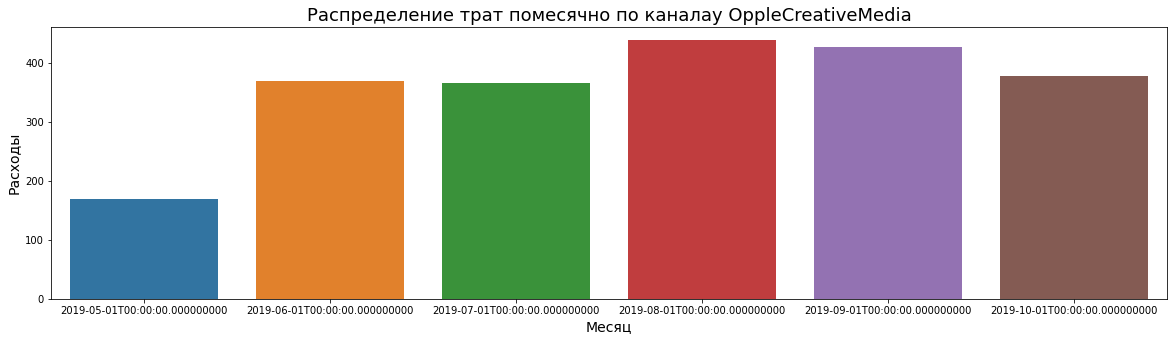

In [45]:
plt.figure(figsize=(20, 5))
sns.barplot(data=OppleCreativeMedia_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау OppleCreativeMedia', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Распределение затрат на маркетинг по месяцам в канале `OppleCreativeMedia` схоже с  `WahooNetBanner` и `FaceBoom`, такое же равномерное с минимальными затратами в мае и максимальными в августе, графики схожи. Но в абсолютных показателях расходы в разы меньше.

**RocketSuperAds**

In [46]:
RocketSuperAds_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'RocketSuperAds']
display(RocketSuperAds_per_month)

,channel,month,total_costs_per_month
30,RocketSuperAds,2019-05-01,577.98
31,RocketSuperAds,2019-06-01,325.71
32,RocketSuperAds,2019-07-01,252.07
33,RocketSuperAds,2019-08-01,253.11
34,RocketSuperAds,2019-09-01,218.40
35,RocketSuperAds,2019-10-01,205.73


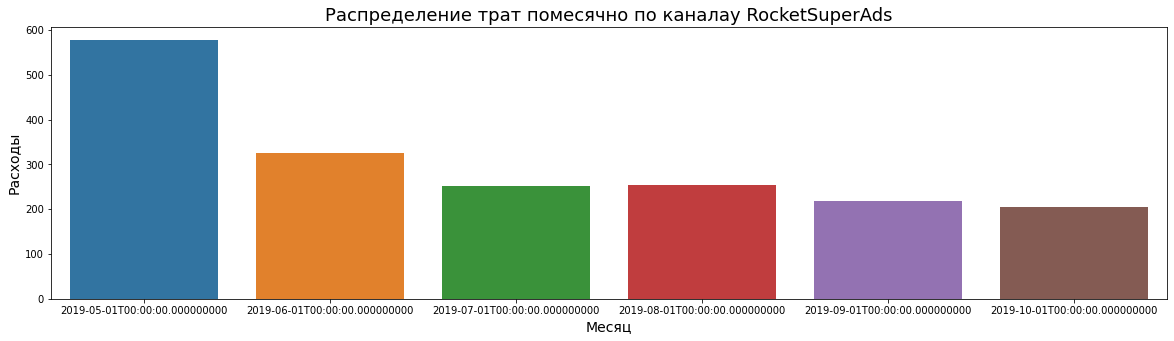

In [47]:
plt.figure(figsize=(20, 5))
sns.barplot(data=RocketSuperAds_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау RocketSuperAds', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Затраты на маркетинг в этом канале равномерны. Только в мае они были значительно выше, в остальные месяцы разница минимальна, при этом всё же тренд на снижение. 

**LeapBob**

In [48]:
LeapBob_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'LeapBob']
display(LeapBob_per_month)

,channel,month,total_costs_per_month
12,LeapBob,2019-05-01,140.28
13,LeapBob,2019-06-01,314.58
14,LeapBob,2019-07-01,313.53
15,LeapBob,2019-08-01,369.81
16,LeapBob,2019-09-01,343.98
17,LeapBob,2019-10-01,315.42


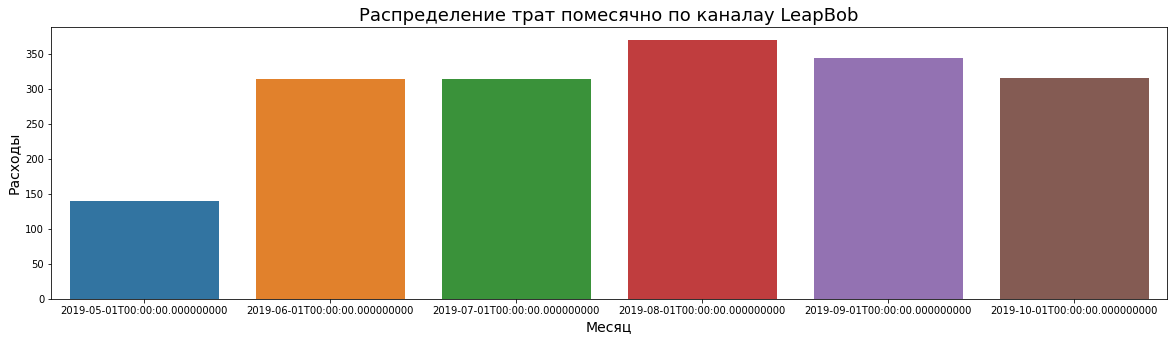

In [49]:
plt.figure(figsize=(20, 5))
sns.barplot(data=LeapBob_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау LeapBob', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Распределение затрат на маркетинг по месяцам в канале `LeapBob` схоже с `WahooNetBanner`, `FaceBoom` и `OppleCreativeMedia`, такое же равномерное с минимальными затратами в мае и максимальными в августе, графики схожи. 

**lambdaMediaAds**

In [50]:
lambdaMediaAds_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'lambdaMediaAds']
display(lambdaMediaAds_per_month)

,channel,month,total_costs_per_month
54,lambdaMediaAds,2019-05-01,458.40
55,lambdaMediaAds,2019-06-01,199.20
56,lambdaMediaAds,2019-07-01,219.20
57,lambdaMediaAds,2019-08-01,220.00
58,lambdaMediaAds,2019-09-01,247.20
59,lambdaMediaAds,2019-10-01,213.60


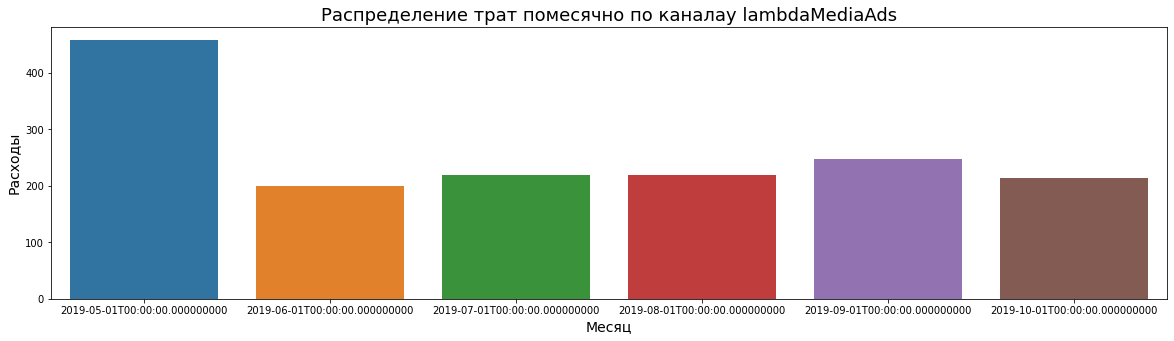

In [51]:
plt.figure(figsize=(20, 5))
sns.barplot(data=lambdaMediaAds_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау lambdaMediaAds', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Затраты на маркетинг в этом канале равномерны. Только в мае они были значительно выше, в остальные месяцы разница минимальна. Распределение по месяцам очень схоже с каналом `AdNonSense`.

**MediaTornado**

In [52]:
MediaTornado_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'MediaTornado']
display(MediaTornado_per_month)

,channel,month,total_costs_per_month
18,MediaTornado,2019-05-01,238.56
19,MediaTornado,2019-06-01,138.00
20,MediaTornado,2019-07-01,138.48
21,MediaTornado,2019-08-01,154.56
22,MediaTornado,2019-09-01,144.72
23,MediaTornado,2019-10-01,140.16


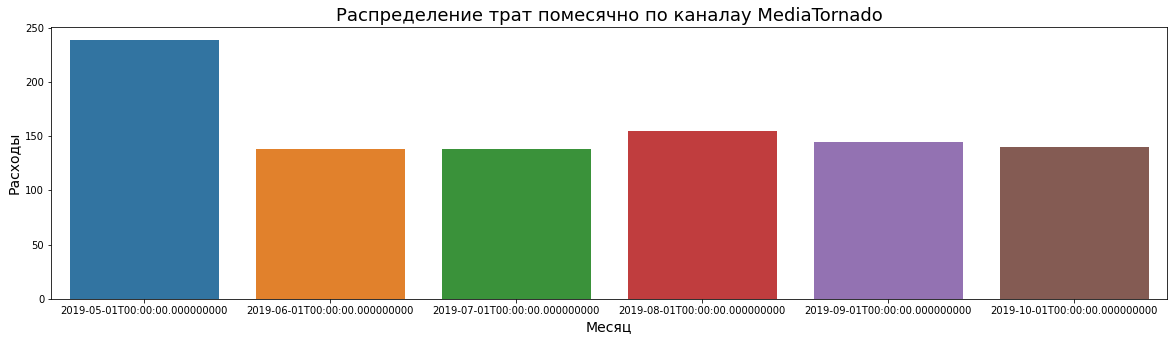

In [53]:
plt.figure(figsize=(20, 5))
sns.barplot(data=MediaTornado_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау MediaTornado', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Затраты на маркетинг в этом канале равномерны. Только в мае они были значительно выше, в остальные месяцы разница минимальна. Распределение по месяцам очень схоже с каналом `AdNonSense` и `lambdaMediaAds`.

**YRabbit**

In [54]:
YRabbit_per_month = total_costs_per_month[total_costs_per_month['channel'] == 'YRabbit']
display(YRabbit_per_month)

,channel,month,total_costs_per_month
48,YRabbit,2019-05-01,299.70
49,YRabbit,2019-06-01,106.20
50,YRabbit,2019-07-01,97.38
51,YRabbit,2019-08-01,124.74
52,YRabbit,2019-09-01,152.79
53,YRabbit,2019-10-01,163.41


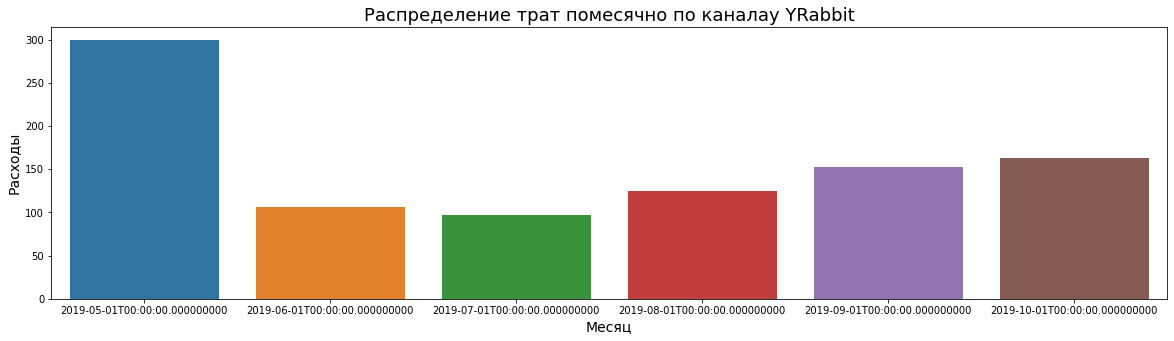

In [55]:
plt.figure(figsize=(20, 5))
sns.barplot(data=YRabbit_per_month, x='month', y='total_costs_per_month')
plt.title('Распределение трат помесячно по каналау YRabbit', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Расходы', fontsize=14);

Помесячные затраты на маркетинг в канале `YRabbit` несколько отличаются от других источников. Самые высокие затраты в мае, затем в июне и июле минимальные затраты, затем тренд на увеличение с августа по октябрь.

### CAC.

Снова обращаемся к табличке с профилями пользователей.

In [56]:
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


Формула для вычисления CAC следующая:
`CAC = Расходы на рекламу / Размер когорты`

**Рассчитаем средний CAC на одного пользователя для всего проекта.**

In [57]:
print('Общая сумма расходов на маркетинг составляет:', round(costs['costs'].sum(), 2))

Общая сумма расходов на маркетинг составляет: 105497.3


In [58]:
print('Общее количество уникальных пользователей составляет:', profiles['user_id'].nunique())

Общее количество уникальных пользователей составляет: 150008


Для корректных расчётов нам необходимо исключить пользователей из канала `organic`,т.к. на них не было никаких затрат.
Теперь отфильтруем датафрейм `profiles` и назовём его `profiles_without_organic`.

In [59]:
profiles_without_organic = profiles[profiles['channel'] != 'organic']
profiles_without_organic

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.01
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.90
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.12
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60


In [60]:
print('Cредний CAC на одного пользователя для всего проекта составляет:', round(round(costs['costs'].sum(), 2) / profiles_without_organic['user_id'].nunique(), 2))

Cредний CAC на одного пользователя для всего проекта составляет: 1.13


**Теперь рассчитаем средний CAC для каждого источника трафика.**

Создадим датафрейм `cac_and_channel`, в котором выделим количество пользователей и общие затраты по каждому каналу (без канала `organic`). Это позволит вычислить САС для каждого канала.

In [61]:
cac_and_channel = profiles_without_organic.groupby('channel').agg({'user_id': 'nunique', 'acquisition_cost': 'sum'}).reset_index()
cac_and_channel.columns = ['channel', 'total_users', 'total_cost']
cac_and_channel['cac'] = cac_and_channel['total_cost'] / cac_and_channel['total_users']
cac_and_channel.sort_values(by='cac', ascending=False)

,channel,total_users,total_cost,cac
6,TipTop,19561,54751.30,2.80
1,FaceBoom,29144,32445.60,1.11
0,AdNonSense,3880,3911.25,1.01
9,lambdaMediaAds,2149,1557.60,0.72
7,WahooNetBanner,8553,5151.00,0.60
5,RocketSuperAds,4448,1833.00,0.41
4,OppleCreativeMedia,8605,2151.25,0.25
8,YRabbit,4312,944.22,0.22
3,MediaTornado,4364,954.48,0.22
2,LeapBob,8553,1797.60,0.21


Визуализируем для наглядности.

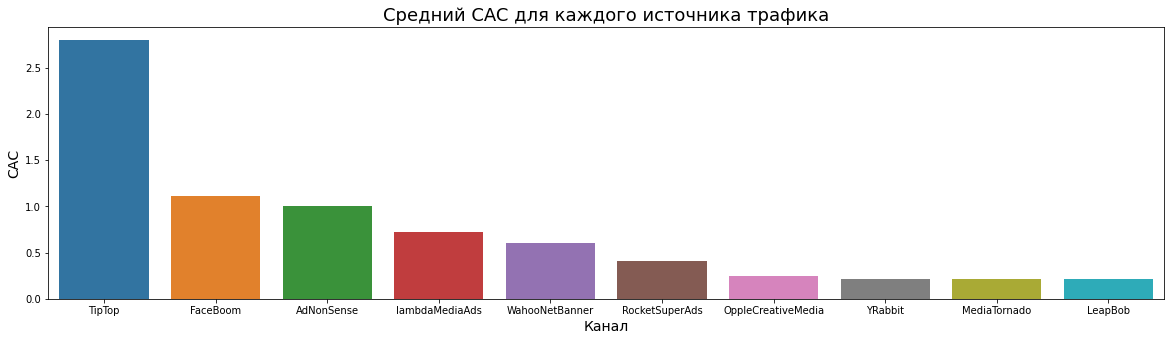

In [62]:
plt.figure(figsize=(20, 5))
sns.barplot(data=cac_and_channel.sort_values(by='cac', ascending=False), x='channel', y='cac')
plt.title('Средний CAC для каждого источника трафика', fontsize=18)
plt.xlabel('Канал', fontsize=14)
plt.ylabel('САС', fontsize=14);

### Вывод.

Как видно из представленных данных самым дорогим источником привлечения является канал TipTop, второе место занимает FaceBoom, третье - AdNonSense. Очевидно, что самые большие затраты приходятся на канал TipTop и FaceBoom. Причём затраты на каждый из них значительно превосходят суммарные затраты на все остальные каналы. 

## Оценка окупаемости рекламы для привлечения пользователей.

### Проанализируйте общую окупаемость рекламы.

Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двухнедельный горизонт анализа.

In [63]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Для начала оценим общую ситуацию и посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv()` и `plot_ltv_roi()`.

In [64]:
# Здесь расчёты с органическим каналом.
# считаем LTV и ROI
#ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    #profiles, orders, observation_date, horizon_days
#)

# строим графики
#plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

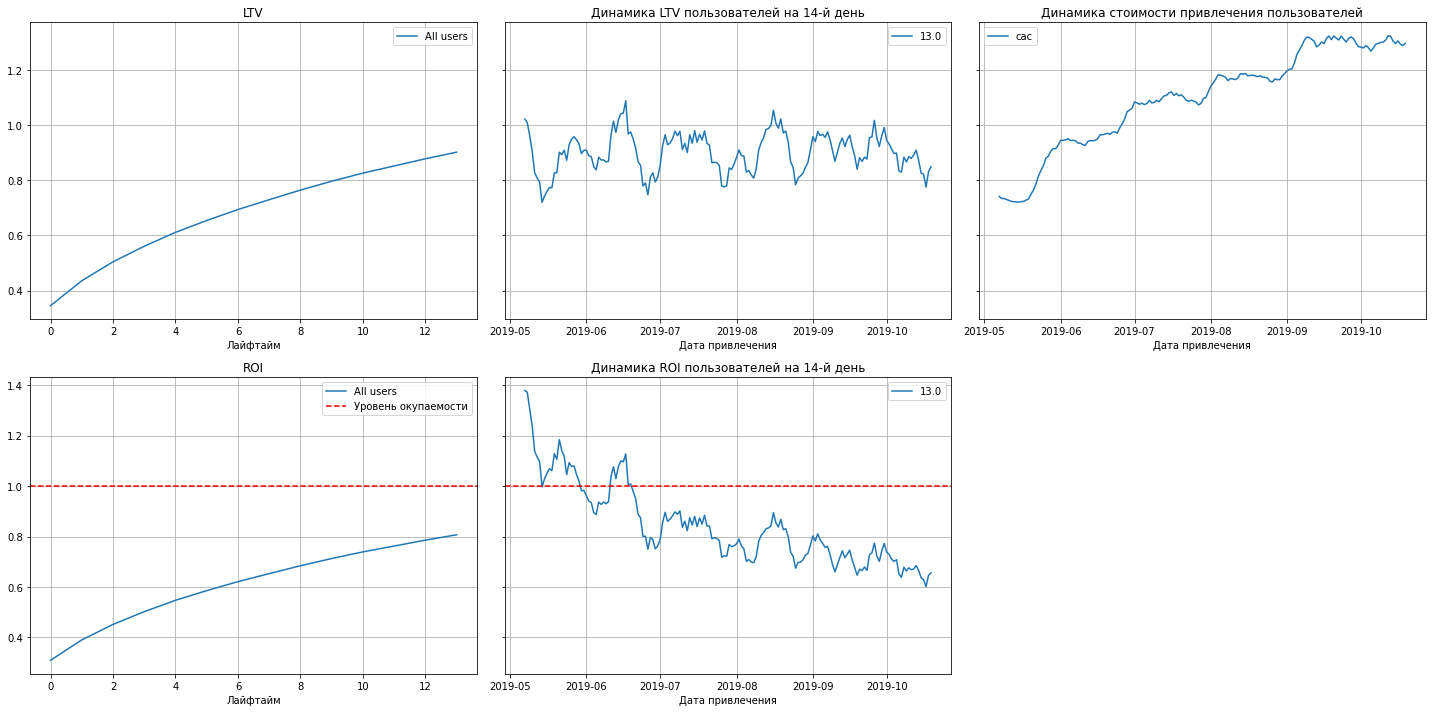

In [65]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

### Вывод.

* ROI всех пользователей не дотягивает до линии окупаемости.
* Снижение с 6 дня динамики ROI.
* График LTV выглядит идеально.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам.

Проанализируем окупаемость рекламы с разбивкой по устройствам.

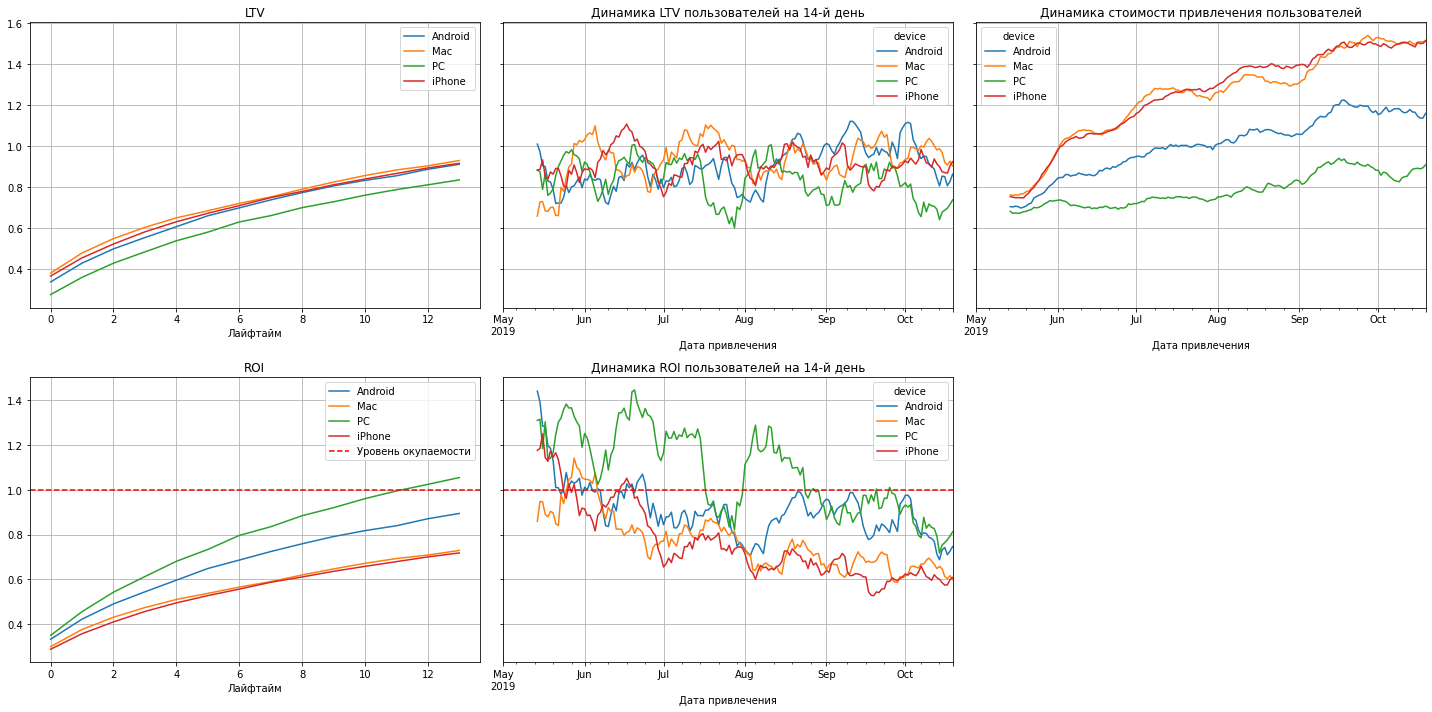

In [66]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Вывод.

Графики вывглядят очень релевантно относительно друг друга, показатели крайне схожи, но у iPhone и Mac самая дорогая стоимость привлечения и они оба не дотягивают до линии окупаемости, только PC дотягивает до неё.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

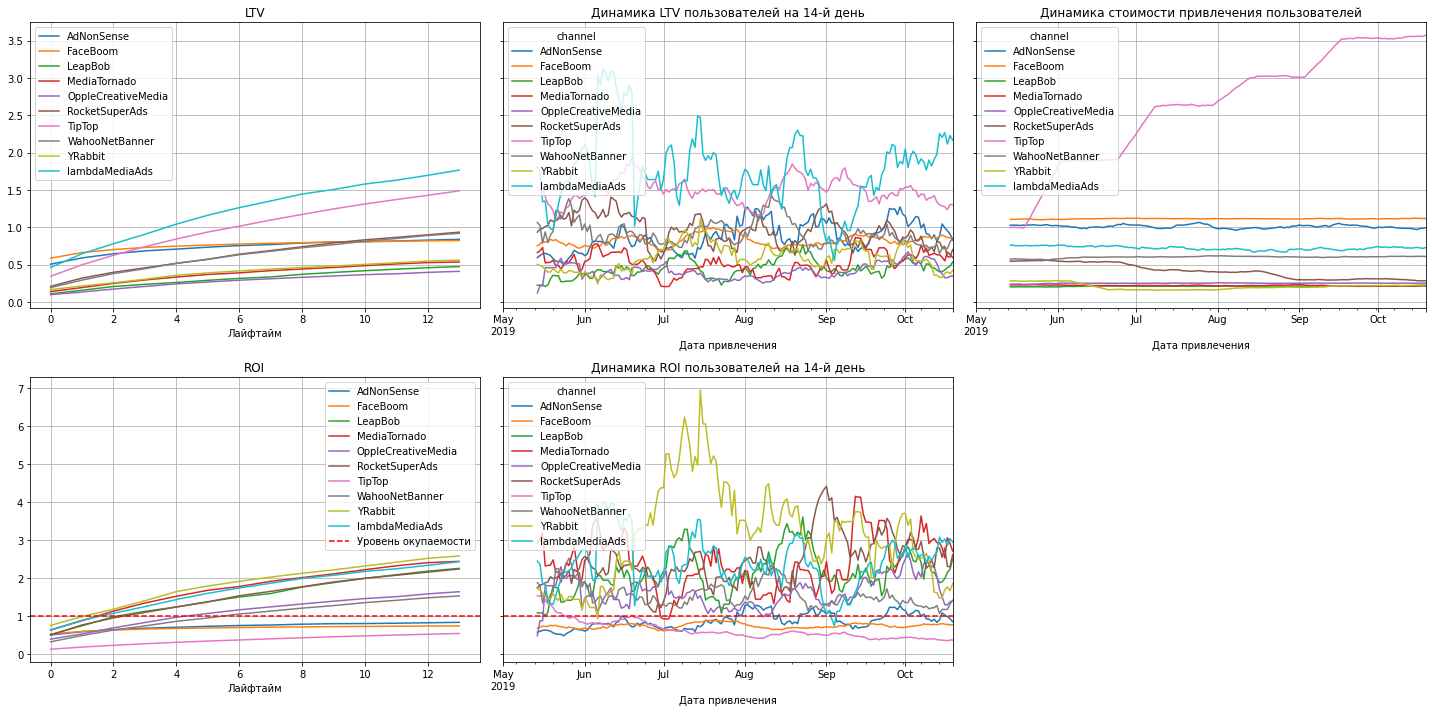

In [67]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Вывод.

* Наглядно видно, что 2 канала, на которые направлены максимальные рекламные бюджеты (`FaceBoom`, `TipTop`), находятся ниже линии окупаемости.
* Вызывает интерес странная динамика стоимости привлечения пользователей на канале `TipTop`, т.к. она значительно растёт в то время, как в остальных каналах относительно стабильна.

### Проанализируйте окупаемость рекламы с разбивкой по странам.

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

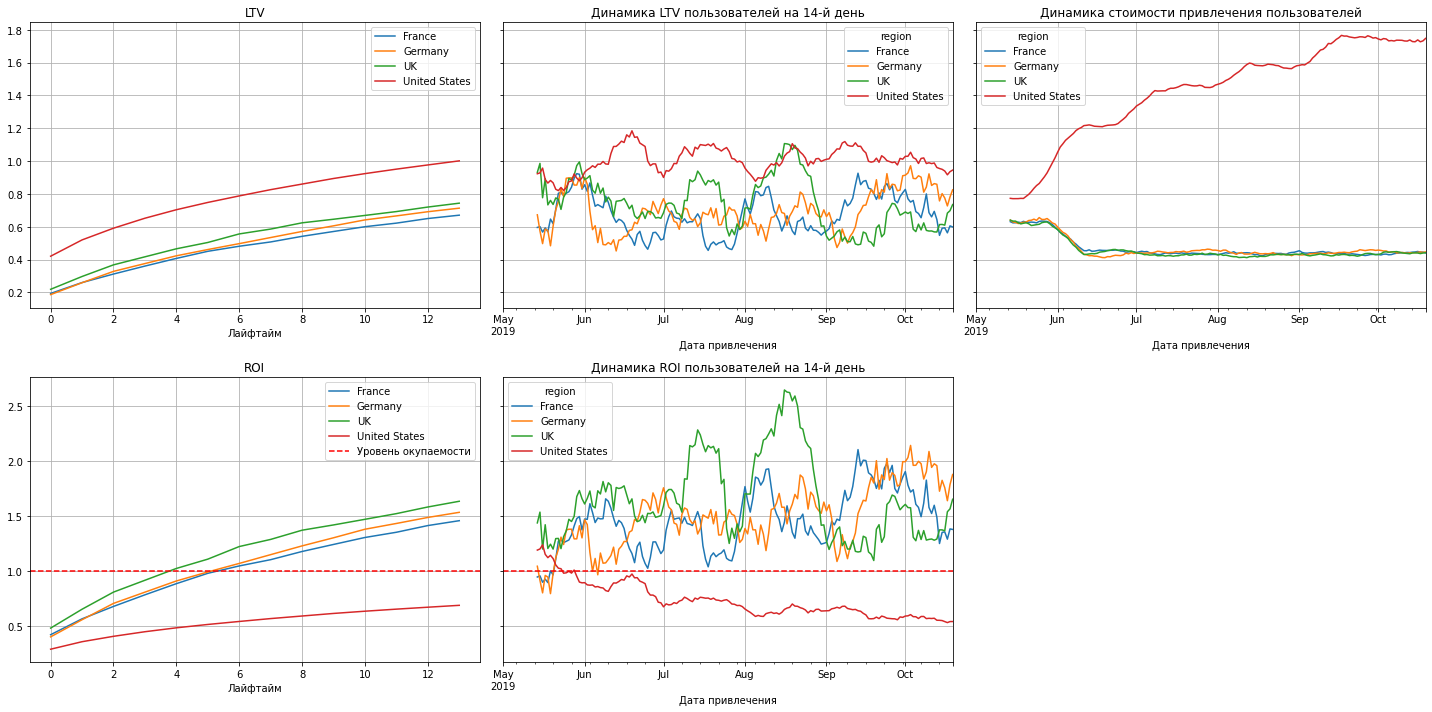

In [68]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Вывод.

Из всех регионов показатели США самые противоречивые. Динамика стоимости привлечения значительно превышает все остальные, следовательно в США самый большой маркетинговый бюджет, LTV также лучше всех остальных. Напомним, что этот регион привлекает больше всего пользователей, как мы выяснили ранее. В тоже самое время именно США не окупает затраты на рекламу, остальные регионы окупают.

### Конверсия и удержание.

Изучим конверсию и удержание с разбивкой по регионам. Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

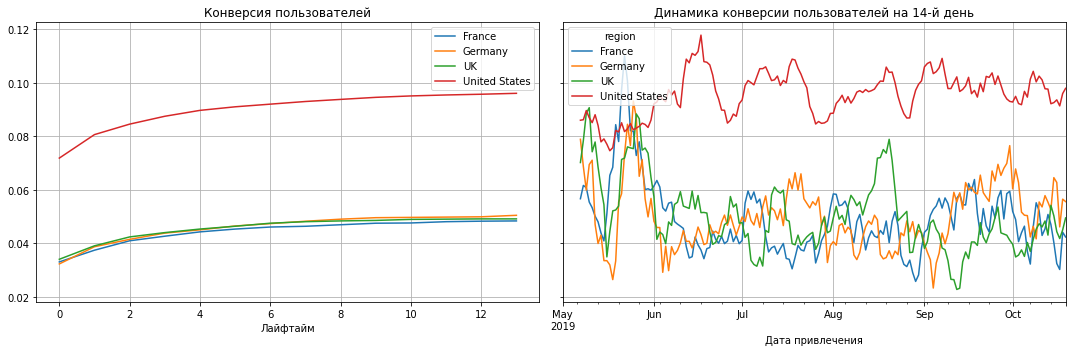

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из США конвертируются очень хорошо, превышая показатели остальных регионов. Видимо, дело в удержании. Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках этот показатель.

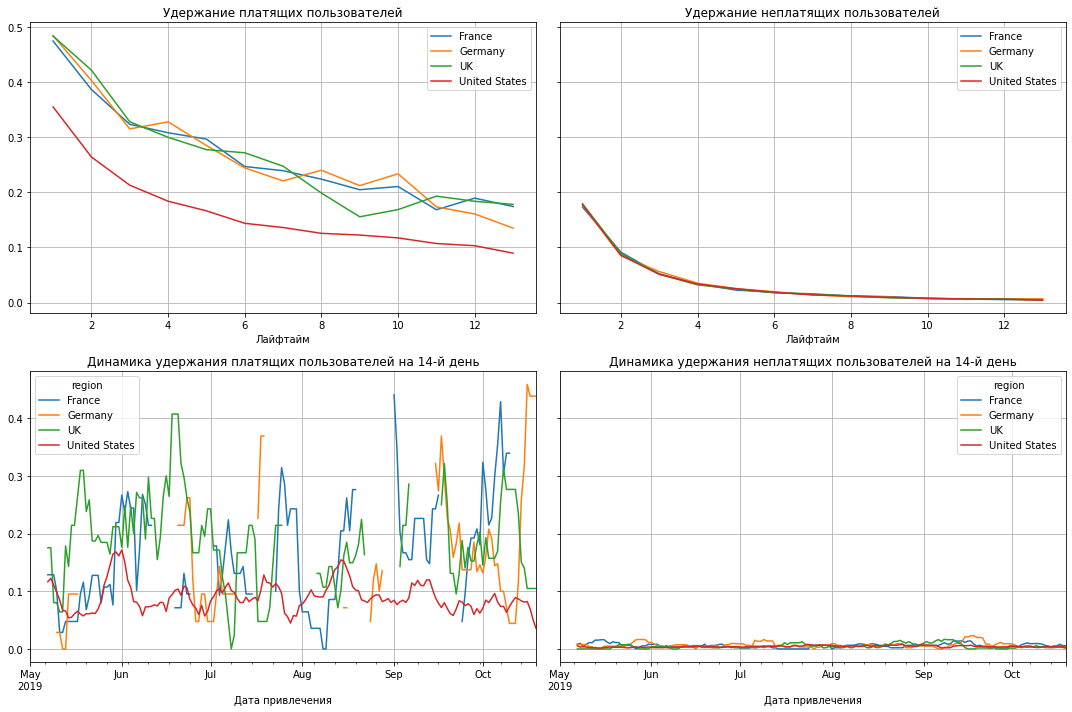

In [70]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Очевидно, что удержание платящих пользователей из США имеет самые худшие показатели. С учётом огромных бюджетов и самого большого количества пользователей отрицательное влияние негативных показателей США на общую картину сложно переоценить.

## Вывод.

Если ответить однозначно на общий вопрос, окупается ли реклама в целом, то ответ будет отрицательным - реклама не окупается. Но бизнесу нужны не такие ответы, нужна конструктивная критика, поиск слабых звеньев, источников проблем.
Для понимания проблемы, а затем поиска её решения, необходимо получить большую детализацию.

Устройства: мы узнали, что iPhone и Mac имеют самую дорогую стоимость привлечения, при этом оба находятся ниже линии окупаемости. 

Страны: На США тратится самый большой маркетинговый бюджет, который тем не менее не окупает затраты на рекламу.

Каналы: `FaceBoom` и `TipTop` имеют максимальные рекламные бюджеты, но находятся ниже линии окупаемости.

# Общие выводы.

По результатам проведённой аналитической работы наибольший интерес вызвали показатели, относящиеся к региону США. Особенно с учётом того, что на США приходится наибольшая часть аудитории пользователей приложения. С одной стороны  пользователи из США конвертируются очень хорошо, превышая показатели остальных регионов. С другой стороны удержание платящих пользователей из США имеет самые худшие показатели. Проще говоря ситуация следующая, из США привлекается больше всего пользователей, многие совершают покупку, но при этом удержать их не получается. Важно в первую очередь повысить удержание для этих пользователей с помощью введения персональных рекомендаций, рассылок, push-уведомлений, ввода программ лояльности.

Что касается каналов, то в два из них (TipTop и FaceBoom) вкладывается бОльшая часть всего бюджета, при этом реклама в TipTop самая дорогая из всех представленных и совершенно не окупаются. Я бы обратил внимание отдела маркетинга, что реклама в данных каналах не окупается. 

При анализе сводных таблиц, а также графиков LTV и ROI по каналам привлечения обращают на себя внимания сервисы YRabbit и RocketSuperAds. У них одна из самых низких стоимость привлечения пользователей, но при этом графики говорят, что это практически самые окупаемые каналы. Возможно необходимо снизить финансирование TipTop и FaceBoom, но увеличить YRabbit и RocketSuperAds. 

Также я бы обратил внимание отдела маркетинга на пользователей с  iPhone и Mac, ведь именно эти устройства показывают просадку по ROI. Возможно есть какие-то технические проблемы, связанные с продукцией Apple.